In [223]:
import zipfile
import PIL
from PIL import Image, ImageDraw, ImageOps
import pytesseract
import cv2 as cv
import numpy as np

#link_zip = "/home/bigboss/Documents/Python Practice Files/Python_3_Specialization/small_img.zip"

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('/home/bigboss/haarcascade_frontalface_default.xml')

In [224]:
def news_articles(link_zip):
    '''Receives a zip file or a link to a zip file, opens the file and creates a list of dictionaries 
    containing the original images, text, 
    and images converted to an np.array and returns the list
    
    :params: link_zip, the link to the zip file to be analyzed
    
    :returns: a list of dictionaries'''
    
    
    articles = []
    with zipfile.PyZipFile(link_zip) as archive:   # context manager for zip file
        for entry in archive.infolist():
            with archive.open(entry) as file:
                page_info = {}
                #border = (10, 10, 10, 10)
                page_info['file_name'] = entry.filename
                #print('Analysing in {}'.format(entry.filename))

                img = Image.open(file)
                #img = ImageOps.expand(img, border = border)
                #img_rgb = img.copy()
                #display(img)
                #display(img_rgb)
                page_info['image'] = img

                img = img.convert('L')
                #display(img)
                page_info['text'] = pytesseract.image_to_string(img)
                img = img.convert('RGB')
                #display(img)
                #print("-"*25)

                open_cv_image = np.array(img)
                #display(open_cv_image)
                #print(open_cv_image.shape)
                #print("-"*25)
                open_cv_image = open_cv_image[:, :, ::-1].copy()
                gray = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
                #display(gray)
                page_info['gray'] = gray
                #print(open_cv_image.shape)
                # page_info['bounding_boxes'] = face_cascade.detectMultiScale(gray, 1.35).tolist()

            articles.append(page_info)
    #print('Analysing finished!')
    return articles

In [225]:
def article_search(text_to_search, level_detection, articles):
    """Receives a text string to search, an integer for face detection, and a list of dictionaries 
    with images to be analyzed.
    
    :param: text_to_search, a string of text to search for in the image
    :param: level_detection, an integer for level detection in the face search
    :param: newspaper, a list of dictionaries that has the data on the images to be analyzed 
    processed by the newspaper_info function
    
    :returns: nothing"""
    
    for page in articles:
        #faces = face_cascade.detectMultiScale(page['gray'], level_detection)
        bounding_boxes = list(face_cascade.detectMultiScale(page['gray'], level_detection, 5))
        #bounding_boxes = faces.tolist()
        #print(bounding_boxes)
        if text_to_search in page['text']:
            print('Results found in file {}'.format(page['file_name']))
            if len(bounding_boxes) == 0:
                print('But there were no faces in that file!')
            else:
                rows_size = (len(bounding_boxes) - 1)//5 + 1
                first_image = page['image'].crop((0, 0, 100, 100))
                first_image.thumbnail((100, 100))
                contact_sheet= Image.new(first_image.mode, (first_image.width*5,first_image.height*rows_size))
                x=0
                y=0

                for iboxes in bounding_boxes:
                    box = iboxes @ np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])
                    img = page['image'].crop(box)
                    img.thumbnail((100, 100), Image.Resampling(1))
                    contact_sheet.paste(img, (x, y) )
                    
                    if x+first_image.width == contact_sheet.width:
                        x=0
                        y=y+first_image.height
                    else:
                        x=x+first_image.width

                display(contact_sheet)
    return None


In [226]:
my_articles = news_articles('/home/bigboss/Documents/Python Practice Files/Python_3_Specialization/small_img.zip')

Results found in file a-0.png


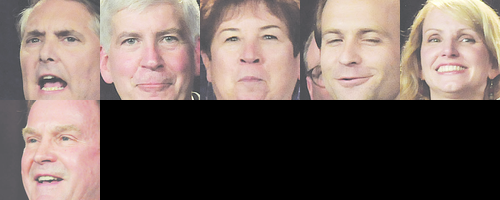

Results found in file a-3.png


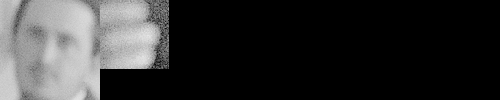

In [227]:
article_search('Christopher', 1.3, my_articles)

In [228]:
my_articles = news_articles('/home/bigboss/Documents/Python Practice Files/Python_3_Specialization/images.zip')

Results found in file a-0.png


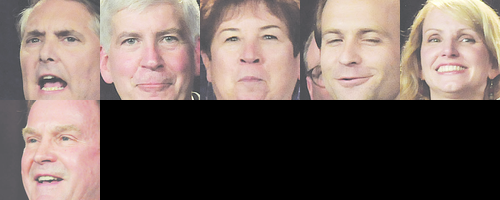

Results found in file a-1.png


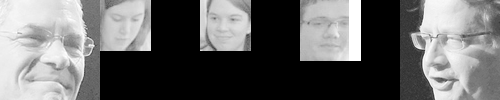

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


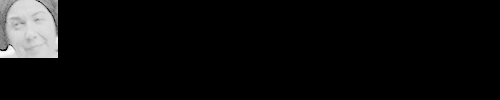

Results found in file a-2.png


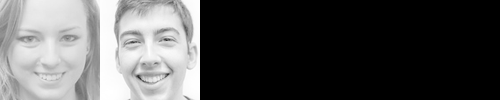

Results found in file a-3.png


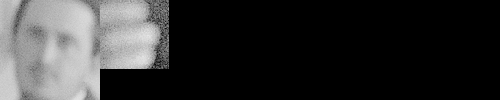

Results found in file a-8.png
But there were no faces in that file!


In [229]:
article_search('Mark', 1.3, my_articles)